In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
#to get current date
from datetime import datetime

#weather api link
weather_api_url = "http://api.openweathermap.org/data/2.5/weather?"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
api_key = '011326282edef3aed96fca5f4a43a52b'
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    latlngCity.append(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

In [7]:
city_col = ["Cities"]
city_df = pd.DataFrame(columns = city_col)
city_df["Cities"] = cities
column_names = ["City", "Country","Temperature (F)", "Latitude",
                             "Longitude","Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]
city_weather_df = pd.DataFrame(columns=column_names)

#counter for cities
city_row_count = 1

for index, row in city_df.iterrows():
    #setting target city for which data is retrieved
    target_city = row["Cities"]
    #Build query URL with each city
    query_url = weather_api_url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    #sending request to weather api and storing the values in json format
    city_json = requests.get(query_url).json()
    #condition to validate if city found
    if city_json["cod"] == "404":
        print("City not found")
    else:
        city_weather_df.at[index, "City"] = city_json["name"]
        city_weather_df.at[index, "Country"] = city_json["sys"]["country"]
        city_weather_df.at[index, "Temperature (F)"] = city_json["main"]["temp"]
        city_weather_df.at[index, "Latitude"] = city_json["coord"]["lat"]
        city_weather_df.at[index, "Longitude"] = city_json["coord"]["lon"]
        city_weather_df.at[index, "Humidity (%)"] = city_json["main"]["humidity"]
        city_weather_df.at[index, "Cloudiness (%)"] = city_json["clouds"]["all"]
        city_weather_df.at[index, "Wind Speed (mph)"] = city_json["wind"]["speed"]
        #priting the output
        print("Proceesing: City # ", city_row_count, "  " , "City Name: ", city_json["name"])
        #incease city row count to keep track for next city
        city_row_count += 1


Proceesing: City #  1    City Name:  Ketchikan
Proceesing: City #  2    City Name:  Victoria
Proceesing: City #  3    City Name:  Nebyliv
Proceesing: City #  4    City Name:  Bom Jesus
Proceesing: City #  5    City Name:  Albany
Proceesing: City #  6    City Name:  Khatanga
Proceesing: City #  7    City Name:  Poum
Proceesing: City #  8    City Name:  Port Alfred
Proceesing: City #  9    City Name:  Thompson
Proceesing: City #  10    City Name:  Carutapera
Proceesing: City #  11    City Name:  Lompoc
Proceesing: City #  12    City Name:  Alofi
Proceesing: City #  13    City Name:  Pisco
Proceesing: City #  14    City Name:  Tautira
Proceesing: City #  15    City Name:  Chowchilla
Proceesing: City #  16    City Name:  New Norfolk
Proceesing: City #  17    City Name:  Punta Arenas
Proceesing: City #  18    City Name:  Saint George
City not found
Proceesing: City #  19    City Name:  Guerrero Negro
Proceesing: City #  20    City Name:  Belaya Gora
Proceesing: City #  21    City Name:  Qaa

In [8]:
city_weather_df.count()

City                530
Country             530
Temperature (F)     530
Latitude            530
Longitude           530
Humidity (%)        530
Cloudiness (%)      530
Wind Speed (mph)    530
dtype: int64

In [9]:
city_weather_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ketchikan,US,50.09,55.34,-131.65,70,1,10.29
1,Victoria,BN,87.37,5.28,115.24,70,75,3.36
2,Nebyliv,UA,32,48.81,24.22,72,75,6.71
3,Bom Jesus,BR,70.61,-9.08,-44.36,95,64,2.48
4,Albany,US,33.03,42.65,-73.75,29,20,14.99


In [10]:
city_weather_df.to_csv("output/City_Data.csv")

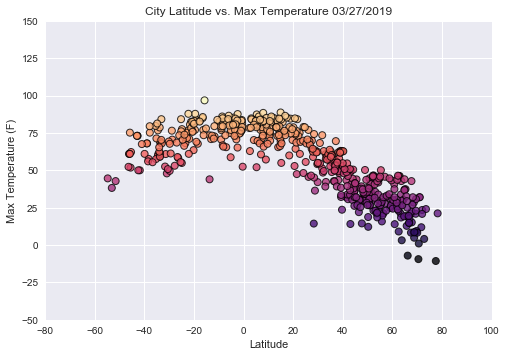

In [15]:
plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Temperature (F)"], 
            c=city_weather_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", cmap='magma', alpha=0.8) 
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-50, 150])


plt.savefig("output/TemperatureGraph.png")

plt.show()


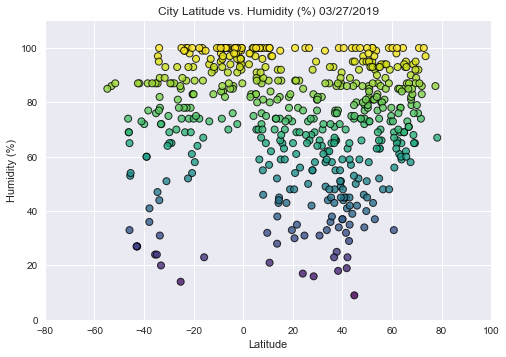

In [18]:
plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Humidity (%)"], 
            c=city_weather_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", cmap='viridis', alpha=0.8)

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 110])

# Save the figure
plt.savefig("output/HumidityGraph.png")

# Show plot
plt.show()

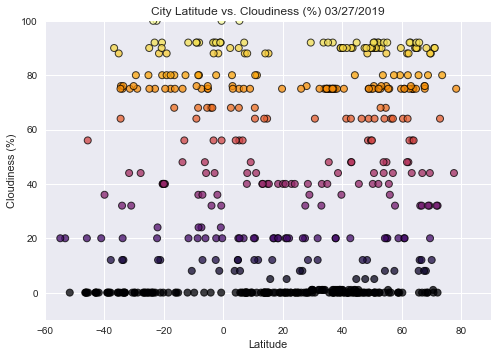

In [19]:
plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Cloudiness (%)"], 
            c = city_weather_df["Cloudiness (%)"],
            edgecolor = "black", linewidths=1, marker="o", cmap='inferno', alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 90])
plt.ylim([-10, 100])

# Save the figure
plt.savefig("output/CloudinessGraph.png")

# Show plot
plt.show()

One trend that can be seen in the data is that the highest temperatures appear to be clustered at latitude 0 near the equator. Another is that  latitude and cloudiness appear to have no relationship, though most of the cities appear to be either 20 percent or below or roughly 80 percent or above humidity, with more sparse distribution between 20 and 80. Humidity and latitude also have no apparent relationship, though the vast majority of cities appear to be above 40 percent humidity regardless of latitude. 